In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anyas-gojo-revival-bondman/sample_submission.csv
/kaggle/input/anyas-gojo-revival-bondman/trainData.csv
/kaggle/input/anyas-gojo-revival-bondman/testData.csv
/kaggle/input/anya-fraud/anyas-gojo-revival-bondman/sample_submission.csv
/kaggle/input/anya-fraud/anyas-gojo-revival-bondman/trainData.csv
/kaggle/input/anya-fraud/anyas-gojo-revival-bondman/testData.csv


# Fraud Detection Model Building and Evaluation

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#Plotly
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,roc_auc_score

from sklearn.metrics import confusion_matrix,classification_report
import pickle
import datetime

## 1. Data Loading and Exploration
* ### Loaded the training dataset.
* ### Checked the shape, first rows, null values, and data types of the training dataset.

In [3]:
#reading the trainset
train=pd.read_csv("/kaggle/input/anyas-gojo-revival-bondman/trainData.csv")
train

,id,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,1,2019-12-15 10:35:10,3597926034019603,fraud_Ruecker Group,misc_net,7.19,Derrick,Flores,M,83690 Nicholas Ports Apt. 846,...,35.2229,-89.5518,9496,Furniture conservator/restorer,1993-03-23,2642fec2e19c9e18e61fe9a88f6bc79a,1355567710,35.189455,-90.121666,0
1,2,2019-04-10 21:49:53,4873783502705038,fraud_Lynch Ltd,shopping_pos,6.32,Elizabeth,Maxwell,F,194 Goodman Fall Apt. 569,...,48.4786,-122.3345,14871,Public house manager,1974-03-10,61cec15bdbd3db31b12f886e8e181380,1334094593,49.004316,-122.745016,0
2,3,2020-02-16 10:56:18,213161869125933,fraud_Bauch-Raynor,grocery_pos,147.59,Monica,Lane,F,3270 Scott Islands,...,44.6084,-70.6993,190,Animal nutritionist,1970-04-17,c8fcf575540e37ce0822cd040148ff57,1361012178,44.455449,-70.809148,0
3,4,2020-04-30 16:14:16,374656033243756,"fraud_Effertz, Welch and Schowalter",entertainment,32.40,David,Lewis,M,1499 Michael Rue,...,38.8954,-77.1633,207410,Mudlogger,1984-07-03,9e9cde0e0963ac746a2cc9938e171c9a,1367338456,39.476941,-77.613438,0
4,5,2019-12-05 21:07:59,6011999606625827,fraud_Wilkinson LLC,personal_care,29.79,Ronald,Carson,M,870 Rocha Drive,...,40.9918,-73.9800,4664,"Radiographer, diagnostic",1965-06-30,0742473d7f6261ce366b43ece063faf3,1354741679,40.863808,-74.674018,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523169,523170,2020-06-17 05:58:27,5154903938030655,"fraud_Kerluke, Considine and Macejkovic",misc_net,22.71,Felicia,Combs,F,825 Martinez Springs Apt. 625,...,37.7827,-80.3129,5216,Community development worker,1993-10-05,3a8126f91af30c99f654b9397ce8c454,1371448707,38.781304,-80.110562,0
523170,523171,2019-03-24 16:26:29,4067137330196900,fraud_Kuhn Group,food_dining,3.47,Christina,Eaton,F,3256 Brooks Field,...,33.9315,-87.6194,1186,Politician's assistant,1986-11-12,24c8c6a7c5628abbd6231a62b948656f,1332606389,34.684771,-86.703349,0
523171,523172,2019-12-02 09:37:54,4538566639857,"fraud_Bins, Balistreri and Beatty",shopping_pos,3.01,Jerry,Kelly,M,3539 Mckenzie Stream,...,40.8170,-74.0000,13835,"Programmer, multimedia",1967-05-28,38d1c235fc36003fe46b6187054f2083,1354441074,40.201126,-74.508935,0
523172,523173,2019-04-09 09:41:29,630484879808,"fraud_Kuhic, Bins and Pfeffer",shopping_net,107.92,Ian,Patton,M,8088 Sherman Radial Suite 689,...,36.4992,-120.0936,123,Early years teacher,1973-02-07,470dc450b589c93f893dcd23f5ecc2a9,1333964489,37.053394,-120.609172,0


In [4]:
#printing the trainset
print(train.shape)

(523174, 23)


In [5]:
train.head(2)

,id,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,1,2019-12-15 10:35:10,3597926034019603,fraud_Ruecker Group,misc_net,7.19,Derrick,Flores,M,83690 Nicholas Ports Apt. 846,...,35.2229,-89.5518,9496,Furniture conservator/restorer,1993-03-23,2642fec2e19c9e18e61fe9a88f6bc79a,1355567710,35.189455,-90.121666,0
1,2,2019-04-10 21:49:53,4873783502705038,fraud_Lynch Ltd,shopping_pos,6.32,Elizabeth,Maxwell,F,194 Goodman Fall Apt. 569,...,48.4786,-122.3345,14871,Public house manager,1974-03-10,61cec15bdbd3db31b12f886e8e181380,1334094593,49.004316,-122.745016,0


In [6]:
print("The data:{}".format(train.shape))

The data:(523174, 23)


In [7]:
train.isna().sum()

id                       0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
train.dtypes

id                         int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

## 2. Data Visualization and Feature Engineering
* ### Plotted the distribution of transaction amounts.
* ### Conducted time series analysis on the daily fraud rate.


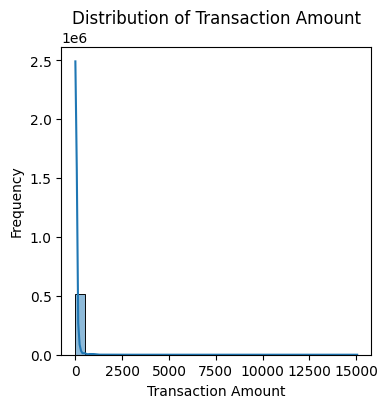

In [9]:
#univariate analysis
plt.figure(figsize=(4, 4))
sns.histplot(train['amt'], bins=30, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


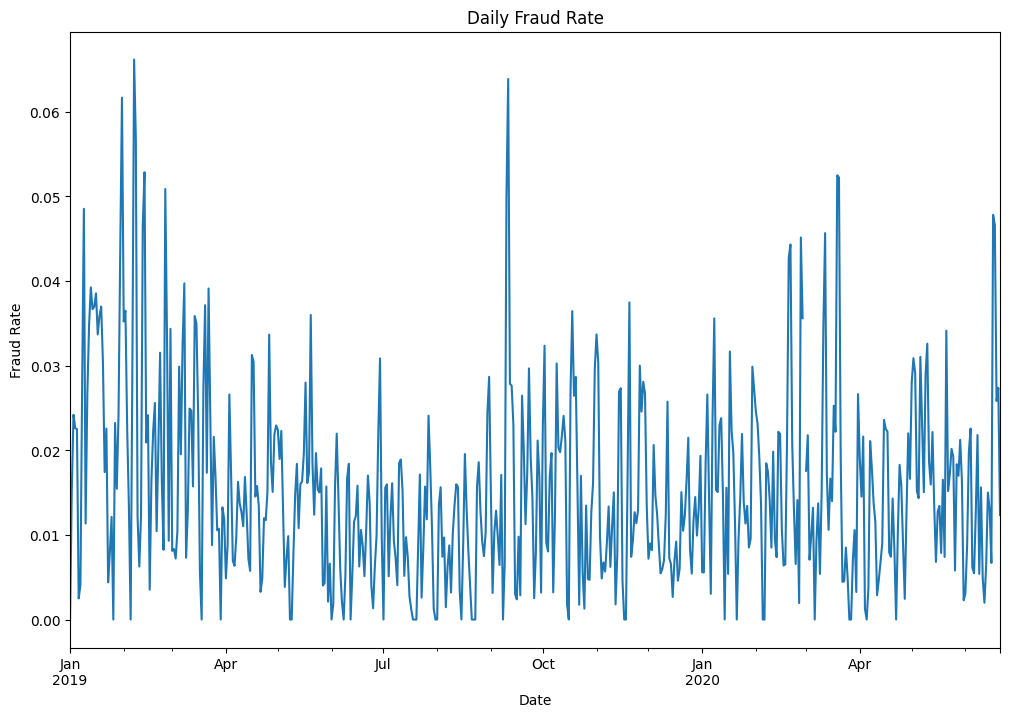

In [10]:
#  time series analysis
train["trans_date_trans_time"]=pd.to_datetime(train['trans_date_trans_time'])
mont=train.set_index('trans_date_trans_time', inplace=False)
plt.figure(figsize=(12, 8))
mont['is_fraud'].resample('D').mean().plot()
plt.title('Daily Fraud Rate')
plt.xlabel('Date')
plt.ylabel('Fraud Rate')
plt.show()

## 3. Feature Engineering and Data Transformation
* ### Engineered additional features such as credit card frequency, transaction hour, and age.


In [11]:
train['cc_frequency']=train['cc_num'].map(train['cc_num'].value_counts())
train["trans_date_trans_time"]=pd.to_datetime(train['trans_date_trans_time'])
train['hour_of_tranx']=train['trans_date_trans_time'].dt.hour
train['dob']=pd.to_datetime(train['dob'])
train['age']=2023-train['dob'].dt.year

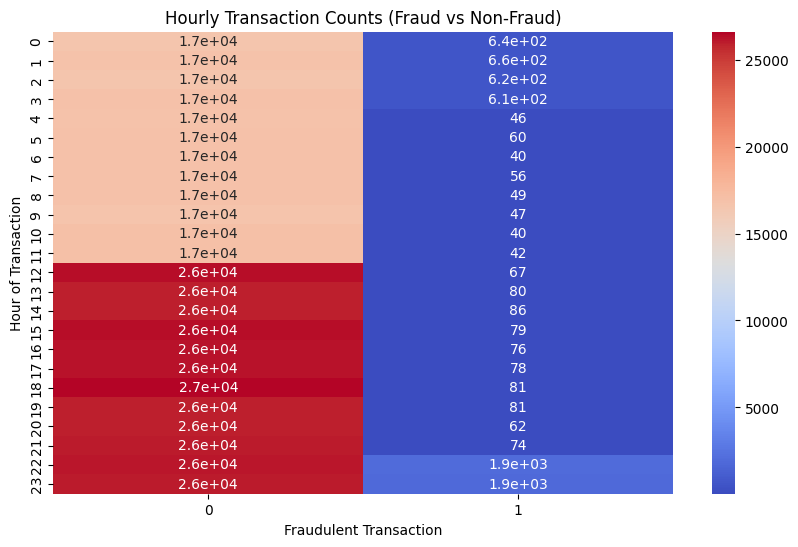

In [12]:
# Hourly transaction counts for fraud vs. non-fraud
hourly_counts = train.groupby(['hour_of_tranx', 'is_fraud']).size().reset_index(name='count')
hourly_counts = hourly_counts.pivot(index='hour_of_tranx', columns='is_fraud', values='count').fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(hourly_counts, annot=True, cmap='coolwarm')
plt.xlabel('Fraudulent Transaction')
plt.ylabel('Hour of Transaction')
plt.title('Hourly Transaction Counts (Fraud vs Non-Fraud)')
plt.show()


In [13]:
train.head(2)

,id,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,cc_frequency,hour_of_tranx,age
0,1,2019-12-15 10:35:10,3597926034019603,fraud_Ruecker Group,misc_net,7.19,Derrick,Flores,M,83690 Nicholas Ports Apt. 846,...,Furniture conservator/restorer,1993-03-23,2642fec2e19c9e18e61fe9a88f6bc79a,1355567710,35.189455,-90.121666,0,412,10,30
1,2,2019-04-10 21:49:53,4873783502705038,fraud_Lynch Ltd,shopping_pos,6.32,Elizabeth,Maxwell,F,194 Goodman Fall Apt. 569,...,Public house manager,1974-03-10,61cec15bdbd3db31b12f886e8e181380,1334094593,49.004316,-122.745016,0,844,21,49


In [14]:
from geopy.distance import geodesic
train['cardholder_location'] = list(zip(train['lat'], train['long']))
train['merchant_location'] = list(zip(train['merch_lat'], train['merch_long']))
train['distance_km'] = train.apply(lambda row: geodesic(row['cardholder_location'], row['merchant_location']).kilometers, axis=1)

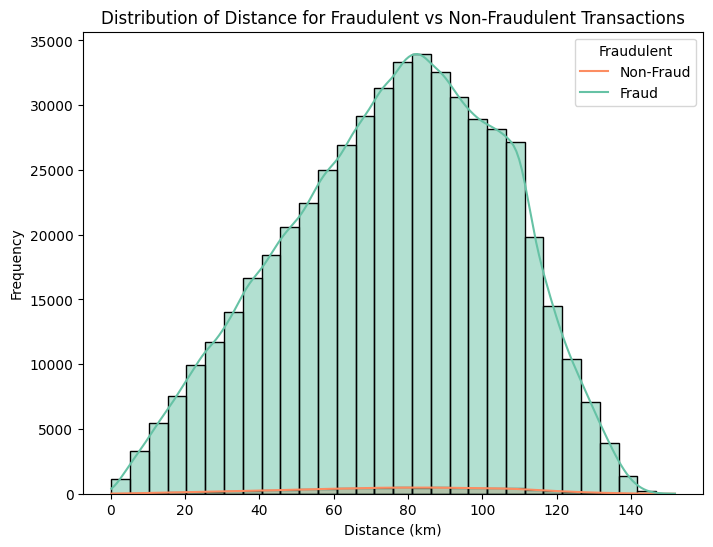

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(data=train, x='distance_km', hue='is_fraud', kde=True, bins=30, palette='Set2')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.title('Distribution of Distance for Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Fraudulent', labels=['Non-Fraud', 'Fraud'])
plt.show()


In [16]:
train.head(2)

,id,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,unix_time,merch_lat,merch_long,is_fraud,cc_frequency,hour_of_tranx,age,cardholder_location,merchant_location,distance_km
0,1,2019-12-15 10:35:10,3597926034019603,fraud_Ruecker Group,misc_net,7.19,Derrick,Flores,M,83690 Nicholas Ports Apt. 846,...,1355567710,35.189455,-90.121666,0,412,10,30,"(35.2229, -89.5518)","(35.189455, -90.121666)",52.023619
1,2,2019-04-10 21:49:53,4873783502705038,fraud_Lynch Ltd,shopping_pos,6.32,Elizabeth,Maxwell,F,194 Goodman Fall Apt. 569,...,1334094593,49.004316,-122.745016,0,844,21,49,"(48.4786, -122.3345)","(49.004316, -122.745016)",65.798350


In [17]:
to_drop=['first','last',"merchant_location","cardholder_location",'gender','trans_date_trans_time','merchant',"id","cc_num",'street','city','state','zip','city_pop',"long","lat","merch_long","merch_lat",'job','trans_num','unix_time','dob']
train=train.drop(to_drop,axis=1)

In [18]:
train=pd.get_dummies(data=train,columns=['category'],drop_first=True)

In [19]:
train.head()

,amt,is_fraud,cc_frequency,hour_of_tranx,age,distance_km,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,7.19,0,412,10,30,52.023619,False,False,False,False,False,False,False,True,False,False,False,False,False
1,6.32,0,844,21,49,65.798350,False,False,False,False,False,False,False,False,False,False,False,True,False
2,147.59,0,639,10,53,19.107901,False,False,False,True,False,False,False,False,False,False,False,False,False
3,32.40,0,621,16,39,75.370883,False,False,False,False,False,False,False,False,False,False,False,False,False
4,29.79,0,609,21,58,60.158105,False,False,False,False,False,False,False,False,False,True,False,False,False


In [20]:
x=train.drop(['is_fraud'],axis=1)
y=train.is_fraud

* ### Splitting the dataset

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=42)


## 4. Model Training and Evaluation 
* ### Created a voting classifier using Random Forest and XGBoost models.
* ### Evaluated the model using accuracy, classification report, and confusion matrix.

In [22]:
def evaluate_model(model, x_test, y_test):
    prediction=model.predict(x_test)
    acc_score=accuracy_score(y_test,prediction)
    print('we have {}% accuracy'.format(acc_score*100))
    plt.figure(figsize=(4,4))
    print(classification_report(y_test,prediction))
    plt.title('Confusion Matrix of the model')
    sns.heatmap(confusion_matrix(y_test,prediction),annot=True,fmt='.5g');
    

In [23]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

In [24]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(x_train, y_train)

we have 99.40211096117162% accuracy
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257757
           1       0.74      0.91      0.82      3830

    accuracy                           0.99    261587
   macro avg       0.87      0.95      0.91    261587
weighted avg       0.99      0.99      0.99    261587



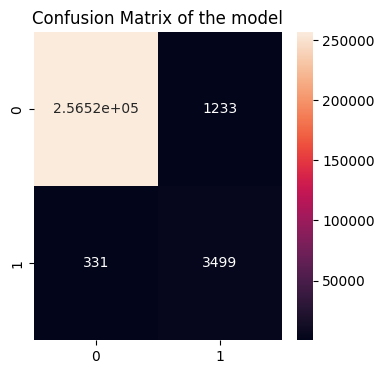

In [25]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42,max_depth=6)

voting_classifier = VotingClassifier(estimators=[
    ('Random Forest', rf_model), 
    ('XGBoost', xgb_model)
], voting='soft') 


voting_classifier.fit(X_resampled, y_resampled)
y_pred = voting_classifier.predict(x_test)
evaluate_model(voting_classifier,x_test,y_test)

we have 99.53896791507223% accuracy
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257757
           1       0.82      0.88      0.85      3830

    accuracy                           1.00    261587
   macro avg       0.91      0.94      0.92    261587
weighted avg       1.00      1.00      1.00    261587



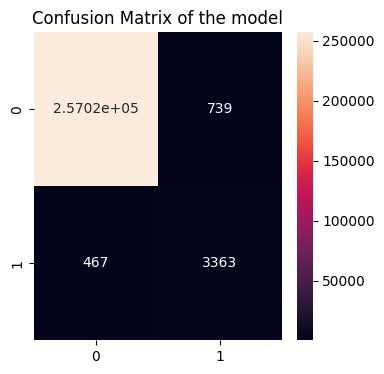

In [26]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=42)
model.fit(X_resampled,y_resampled)
y_pred=model.predict(x_test)
evaluate_model(model,x_test,y_test)

we have 98.57867554580312% accuracy
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    257757
           1       0.51      0.95      0.66      3830

    accuracy                           0.99    261587
   macro avg       0.75      0.97      0.83    261587
weighted avg       0.99      0.99      0.99    261587



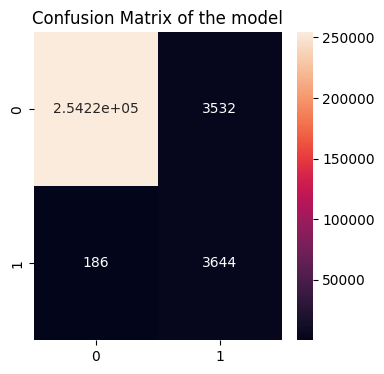

In [27]:
xgb=XGBClassifier(n_estimators=200,max_depth=3,random_state=42)
xgb.fit(X_resampled,y_resampled)
y_pred=xgb.predict(x_test)
evaluate_model(xgb,x_test,y_test)


In [28]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [29]:
roc_auc_score(y_test,y_pred)

0.9688666013492113

## 5. Cross-Validation and Additional Metrics
* ### Conducted cross-validation and printed ROC AUC scores.

In [30]:
from sklearn.model_selection import cross_val_score
num_folds=5
cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=num_folds, scoring='roc_auc')

# Print cross-validation scores
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores)}")
print(f"Standard Deviation of CV Accuracy: {np.std(cv_scores)}")

Cross-Validation Scores: [0.99918827 0.99948294 0.99965835 0.99966927 0.99976767]
Mean CV Accuracy: 0.9995532997990898
Standard Deviation of CV Accuracy: 0.00020427502346451832


              precision    recall  f1-score   support

           0       1.00      0.99      0.99    257757
           1       0.51      0.95      0.66      3830

    accuracy                           0.99    261587
   macro avg       0.75      0.97      0.83    261587
weighted avg       0.99      0.99      0.99    261587



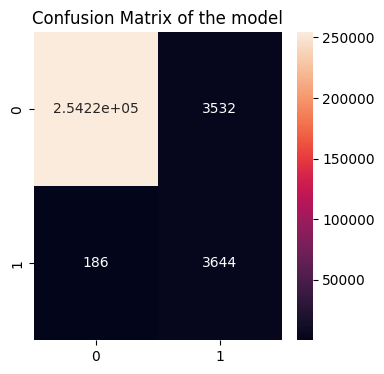

In [31]:
plt.figure(figsize=(4,4))
print(classification_report(y_test,y_pred))
plt.title('Confusion Matrix of the model')
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.5g');


## 6. Preprocessing the Test Data and Making Predictions
* ### Loaded the test dataset.
* ### Engineered features for the test data.
* ### Made predictions on the test data using the trained XGBoost model.

In [32]:
test=pd.read_csv("/kaggle/input/anyas-gojo-revival-bondman/testData.csv")

In [33]:
test.head()

,id,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
0,1,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714
1,2,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431
2,3,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111
3,4,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061
4,5,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734


In [34]:
test['cc_frequency']=test['cc_num'].map(test['cc_num'].value_counts())
test["trans_date_trans_time"]=pd.to_datetime(test['trans_date_trans_time'])
test['hour_of_tranx']=test['trans_date_trans_time'].dt.hour
test['dob']=pd.to_datetime(test['dob'])
test['age']=2023-test['dob'].dt.year

In [35]:
from geopy.distance import geodesic
test['cardholder_location'] = list(zip(test['lat'], test['long']))
test['merchant_location'] = list(zip(test['merch_lat'], test['merch_long']))
test['distance_km'] = test.apply(lambda row: geodesic(row['cardholder_location'], row['merchant_location']).kilometers, axis=1)

In [36]:
to_drop=['first','last',"merchant_location","cardholder_location",'gender','trans_date_trans_time','merchant',"id","cc_num",'street','city','state','zip','city_pop',"long","lat","merch_long","merch_lat",'job','trans_num','unix_time','dob']
test=test.drop(to_drop,axis=1)

In [37]:
test=pd.get_dummies(data=test,columns=['category'],drop_first=True)

In [38]:
y_pred_test=xgb.predict(test)

## 7. Submission Preparation
* ### Created a DataFrame with predicted classes, performed rounding, and prepared the submission CSV file.


In [39]:
Y=pd.DataFrame(y_pred_test)
Y

,0
0,0
1,0
2,0
3,0
4,0
...,...
555714,0
555715,0
555716,0
555717,0


In [40]:
Y.insert(0,"id",range(1,1+len(Y)))
Y

,id,0
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
555714,555715,0
555715,555716,0
555716,555717,0
555717,555718,0


In [41]:
Y.to_csv("sample106.csv",index=False)

# Conclusion
The entire workflow demonstrates a comprehensive approach to fraud detection, encompassing data exploration, feature engineering, model building, evaluation, and submission preparation. The Voting Classifier, combining Random Forest and XGBoost, showcases a robust solution for tackling fraud detection challenges. The model's performance is assessed through various metrics and visualizations, providing a holistic view of its strengths and potential areas for improvement.

The overall conclusion is that the developed fraud detection model, leveraging ensemble learning and thoughtful feature engineering, is a strong candidate for accurately identifying fraudulent transactions in the given dataset.